<a href="https://colab.research.google.com/github/cemofe788/Cubos_y_Mineria_de_Datos/blob/main/Actividad_8_CyMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Corporación Universitaria Minuto de Dios
##Maestría en Inteligencia de Negocios
##Cubos y Minería de Datos
##Grupo 4
##integrantes: César Enrique Morán Fernández - Gloria Stella Flórez Merchán

#Descripción general del Datataset
El conjunto de datos sobre tendencias de compra de los clientes proporciona información valiosa sobre el comportamiento del consumidor y los patrones de compra. Este conjunto de datos comprende una colección de 3900 registros, cada uno de los cuales representa una compra única de un cliente. Los datos resumen varios atributos, incluidos datos demográficos de los clientes, detalles de compras e interacciones promocionales.

#Características clave
#####ID de cliente (Customer ID): Identificador único para cada cliente
#####Edad (Age): Edad del cliente
#####Género (Gender): Género del cliente (Masculino/Femenino)
#####Artículo comprado (Item Purchased): El artículo comprado por el cliente.
#####Categoría (Category): Categoría del artículo comprado
#####Monto de Compra (Purchase Amount) (USD): El monto de la compra en USD
#####Ubicación (Location): Lugar donde se realizó la compra.
#####Tamaño (Size): Tamaño del artículo comprado.
#####Color (Color): Color del artículo comprado.
#####Temporada (Season): Temporada en la que se realizó la compra.
#Objetivos de aprendizaje
Este conjunto de datos sirve para explorar y aplicar técnicas de análisis de datos. A través de la exploración práctica del conjunto de datos, se puede obtener información sobre:

Limpieza y preprocesamiento de datos: manejo de valores faltantes, inconsistencias de datos y conversiones de tipos de datos
Análisis exploratorio de datos (EDA): generar estadísticas descriptivas, resumir distribuciones de datos y visualizar relaciones de datos.
Prueba de hipótesis: probar suposiciones y sacar conclusiones basadas en evidencia basada en datos

##Importar Librerías

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

##Adquisición de Datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Cargando el Dataset

In [3]:
datos = pd.read_csv("/content/drive/MyDrive/shopping_trends_updated.csv")
datos.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


###Explorando los Datos

In [4]:
datos.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2630,2631,29,Male,Skirt,Clothing,82,Maine,S,Pink,Spring,4.20,No,Free Shipping,No,No,20,Cash,Quarterly
3689,3690,47,Female,Jewelry,Accessories,30,South Carolina,L,Red,Fall,4.50,No,Standard,No,No,8,Bank Transfer,Quarterly
95,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.80,Yes,Free Shipping,Yes,Yes,48,PayPal,Monthly
195,196,51,Male,Jacket,Outerwear,25,New York,M,Magenta,Fall,4.30,Yes,Free Shipping,Yes,Yes,34,Credit Card,Monthly
18,19,52,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.60,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly


###Comprobando el tamaño del Dataset (filas y columnas)

In [5]:
datos.shape

(3900, 18)

###Número de columnas en el Dataset

In [6]:
datos.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

###Información sobre el conjunto de datos con verificación de valores nulos

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

###Resumen Estadístico del Dataframe en Pandas

In [8]:
datos.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


###Limpieza de Datos
####¿Comprobando si hay valores nulos presentes en el conjunto de datos o no?

In [9]:
datos.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

###¿Comprobando si hay valores duplicados presentes en el conjunto de datos o no?

In [10]:
datos.duplicated().sum()

0

##Visualización de Datos

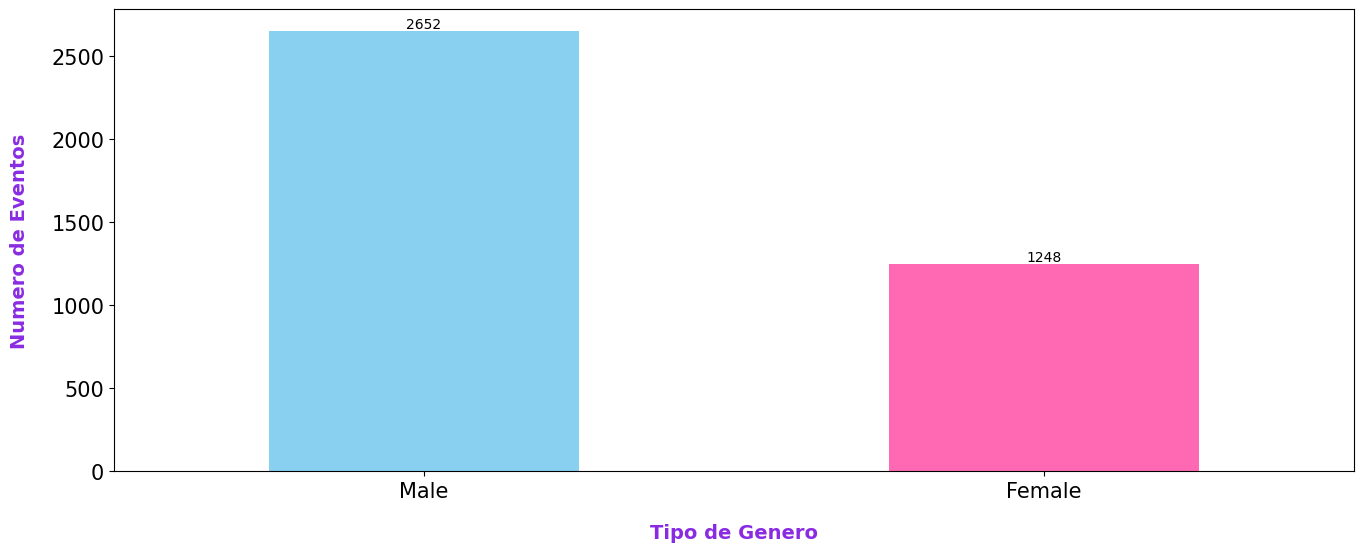

In [11]:
# Visualizar las Variables Clave
plt.figure(figsize = (16, 6))
ax = datos["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Tipo de Genero', weight = "bold", color = "#8A2BE2", fontsize = 14, labelpad = 16)
plt.ylabel('Numero de Eventos', weight = "bold", color = "#8A2BE2", fontsize = 14, labelpad = 16);

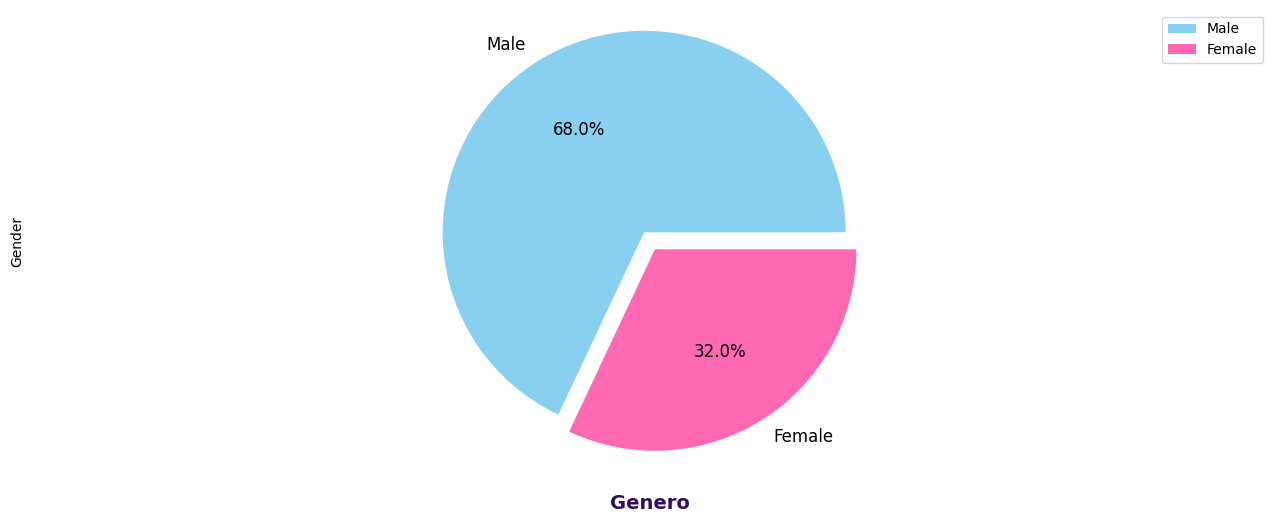

In [12]:
plt.figure(figsize = (16, 6))

counts = datos["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Genero', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 16)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

###Datos por Categoría

In [13]:
datos["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

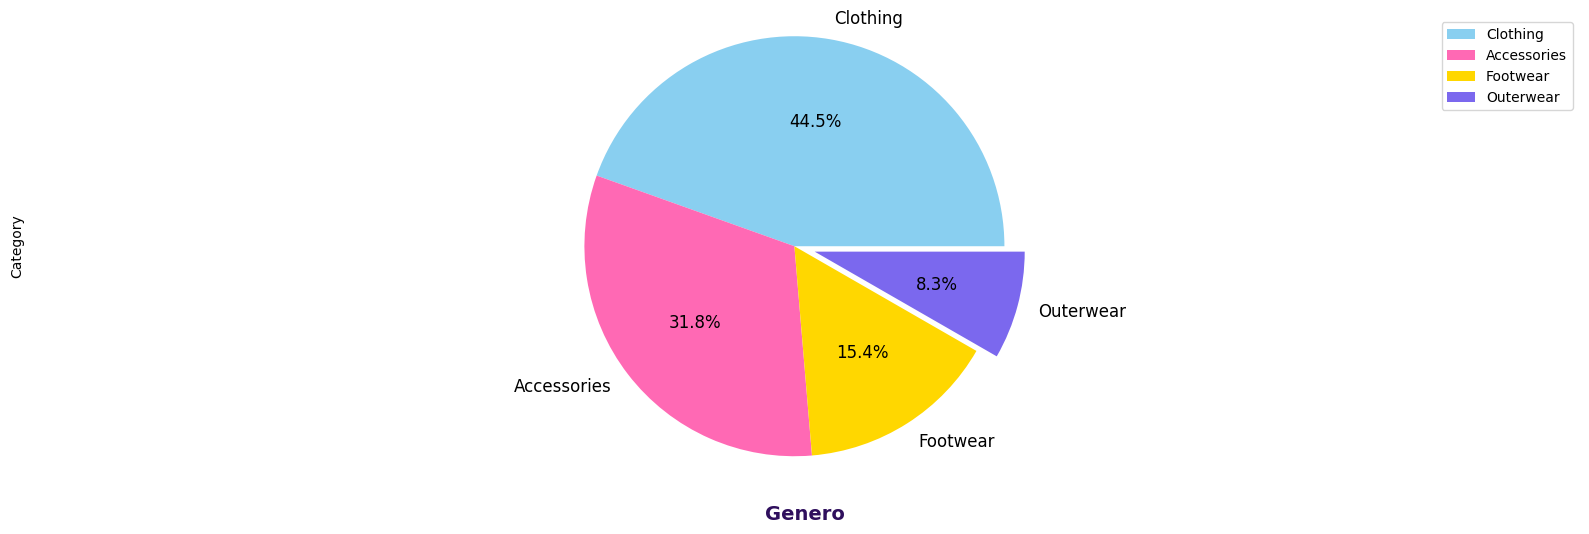

In [14]:
plt.figure(figsize = (20, 6))

counts = datos["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Genero', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

###Cantidad de Artículos Comprados por Categoría

In [15]:
datos["Item Purchased"].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

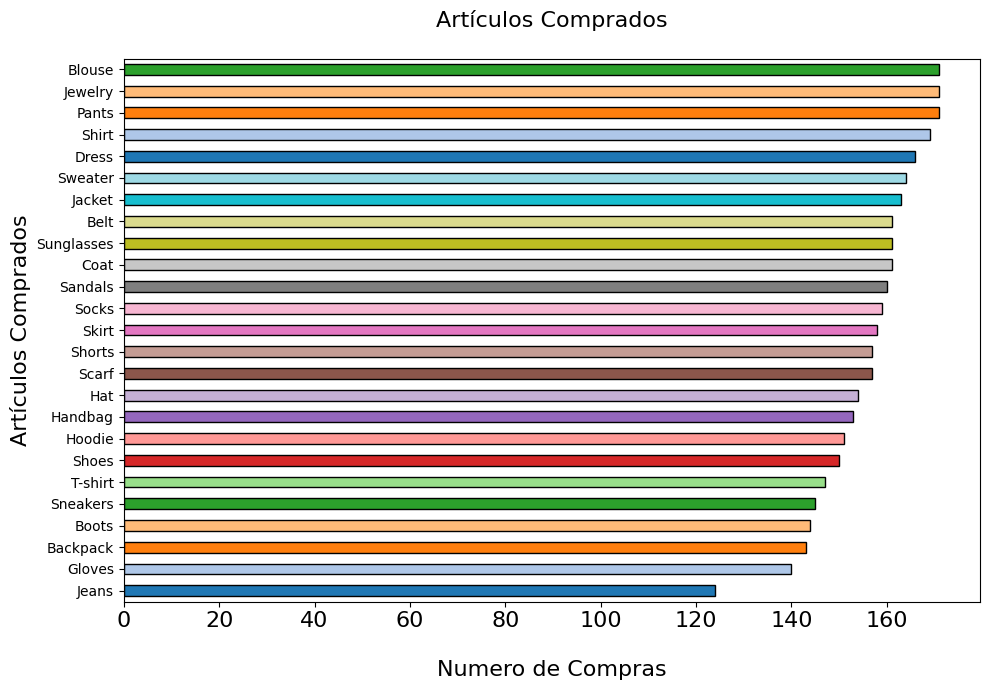

In [16]:
plt.figure(figsize = (10, 7))
datos["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Artículos Comprados', fontsize = 16)
plt.xlabel('\nNumero de Compras', fontsize = 16)
plt.title('Artículos Comprados\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

###Localización de las Compras

In [17]:
datos["Location"].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

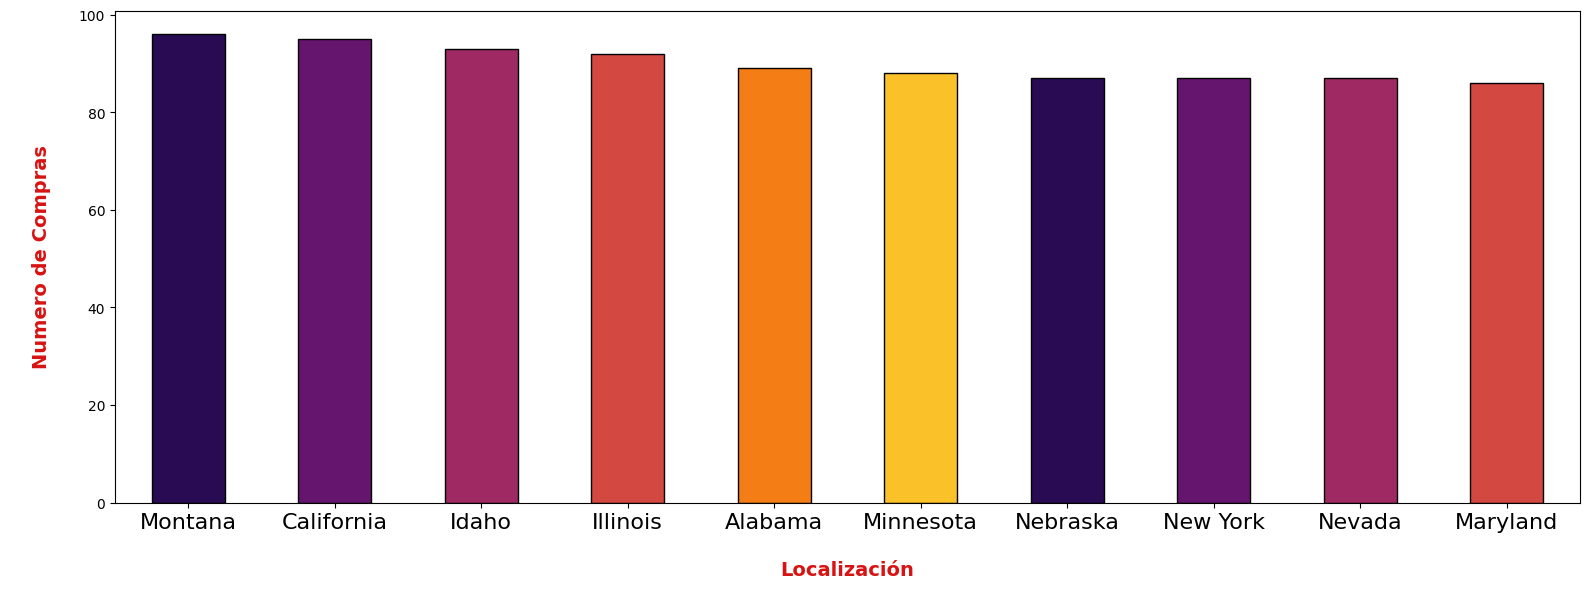

In [18]:
plt.figure(figsize = (16, 6))
datos["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Localización', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumero de Compras', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

###Cantidad por Tallas

In [19]:
datos["Size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

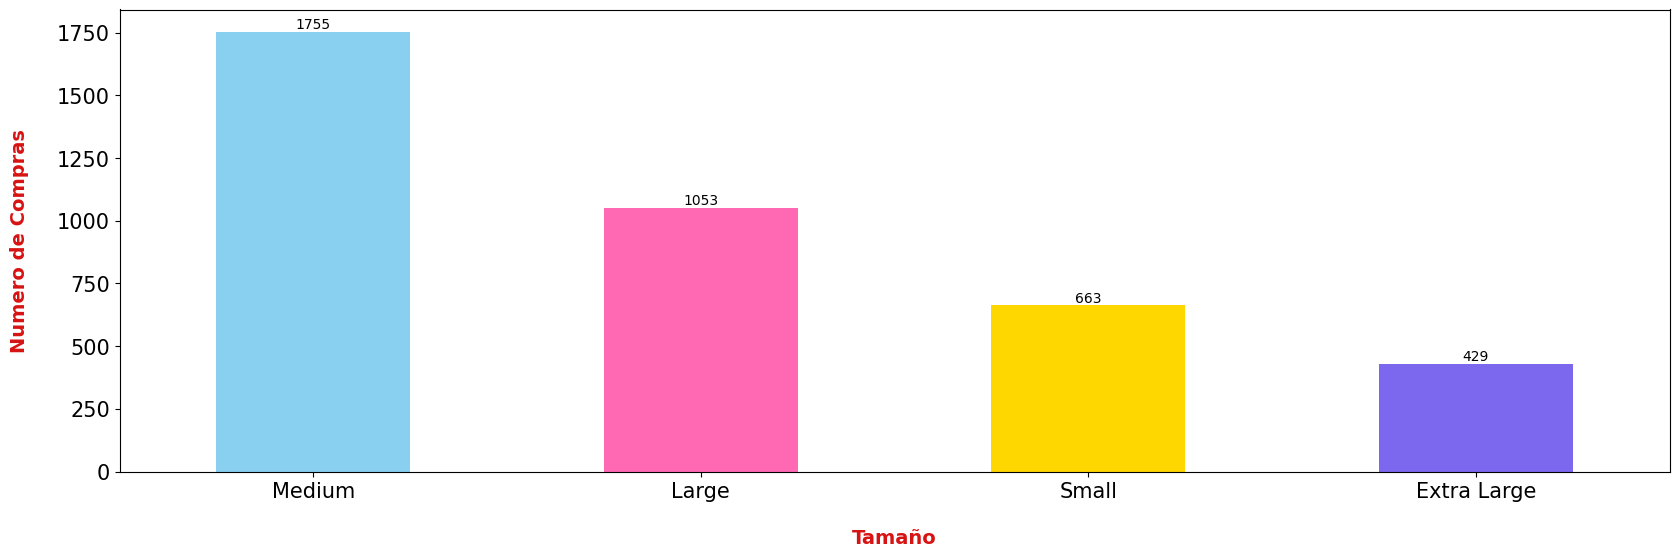

In [20]:
plt.figure(figsize = (20, 6))
ax = datos["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Tamaño', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Numero de Compras', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

###Cantidad por Color

In [21]:
datos["Color"].value_counts()

Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64

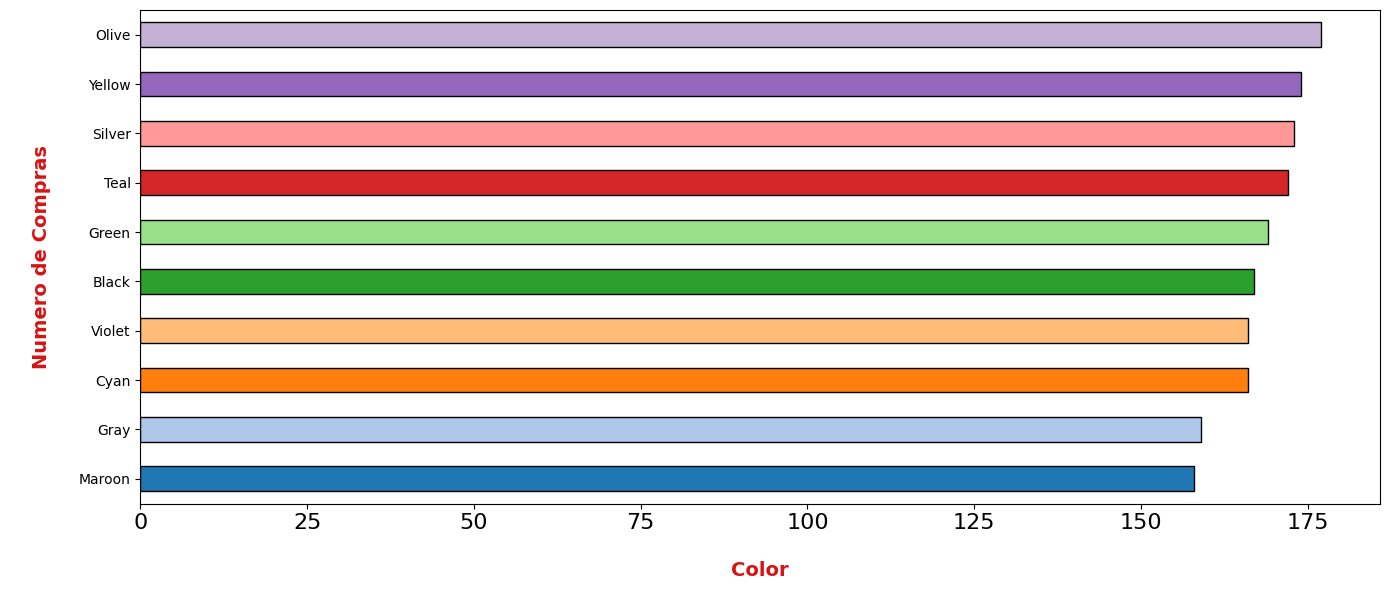

In [22]:
plt.figure(figsize = (14, 6))
datos["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumero de Compras', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

###Datos de acuerdo a la Estación

In [23]:
datos["Season"].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

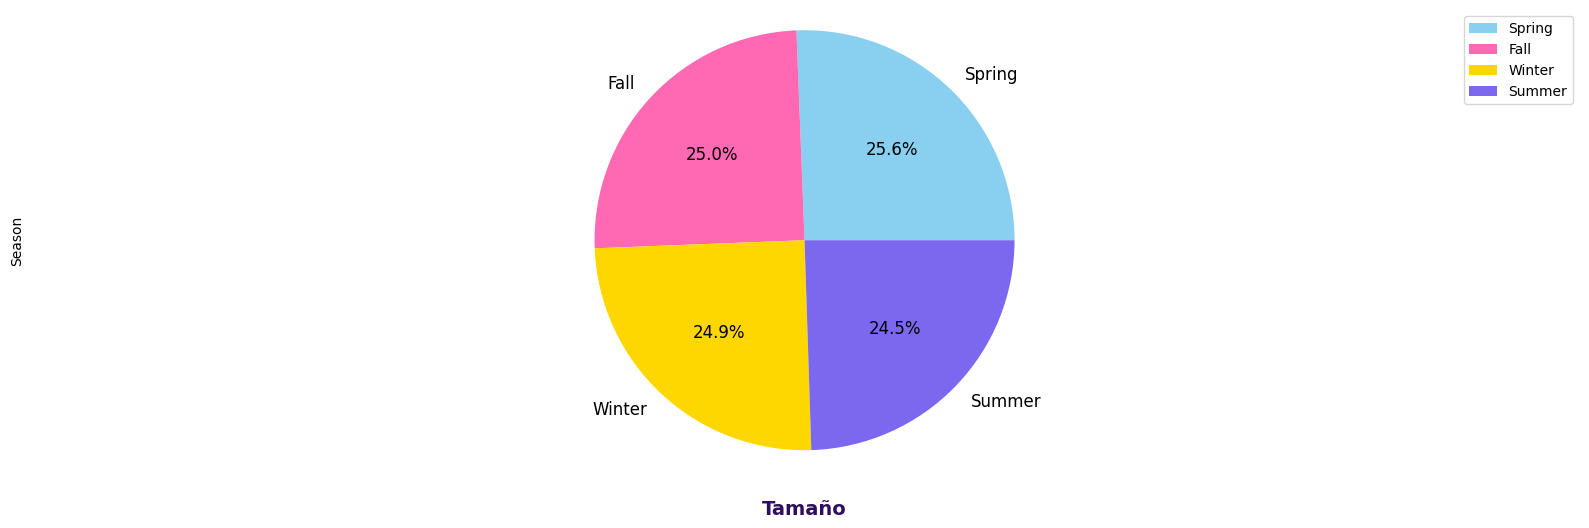

In [24]:
plt.figure(figsize = (20, 6))

counts = datos["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Tamaño', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

###Datos por Estado de Suscripción

In [25]:
datos["Subscription Status"].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

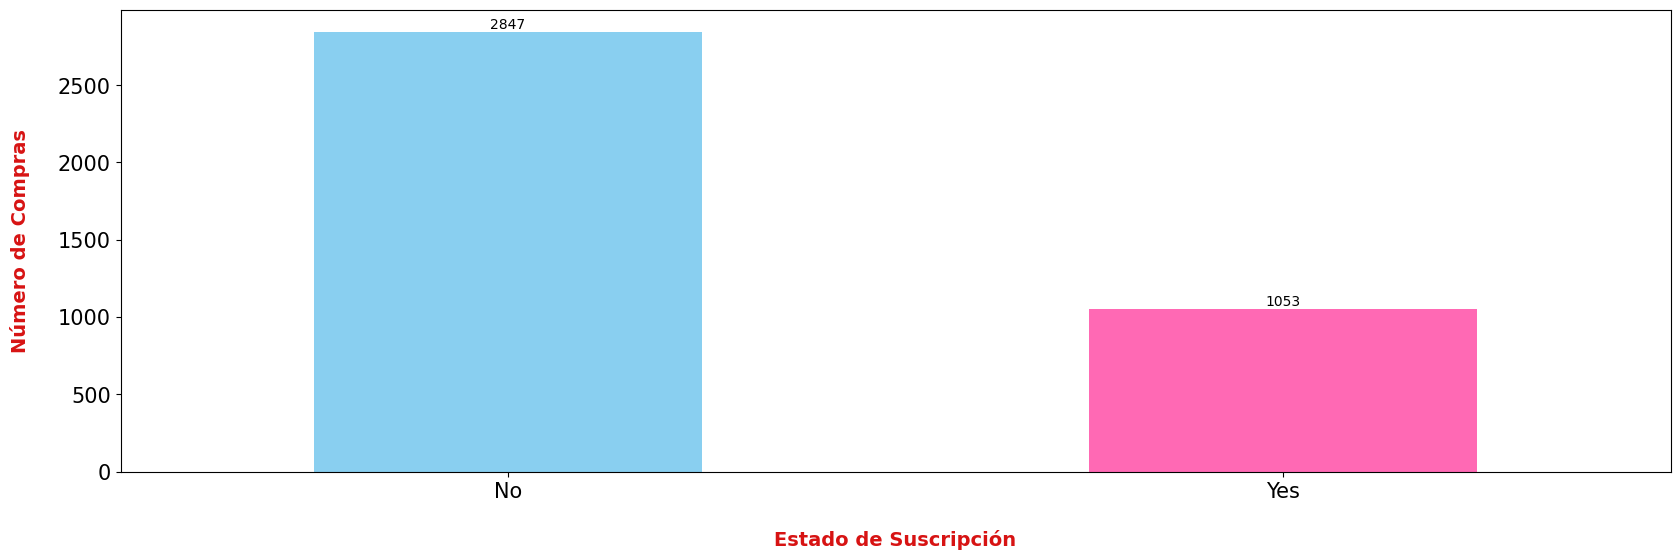

In [26]:
plt.figure(figsize = (20, 6))
ax = datos["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Estado de Suscripción', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Número de Compras', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

###Datos por Método de Pago

In [27]:
datos["Payment Method"].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

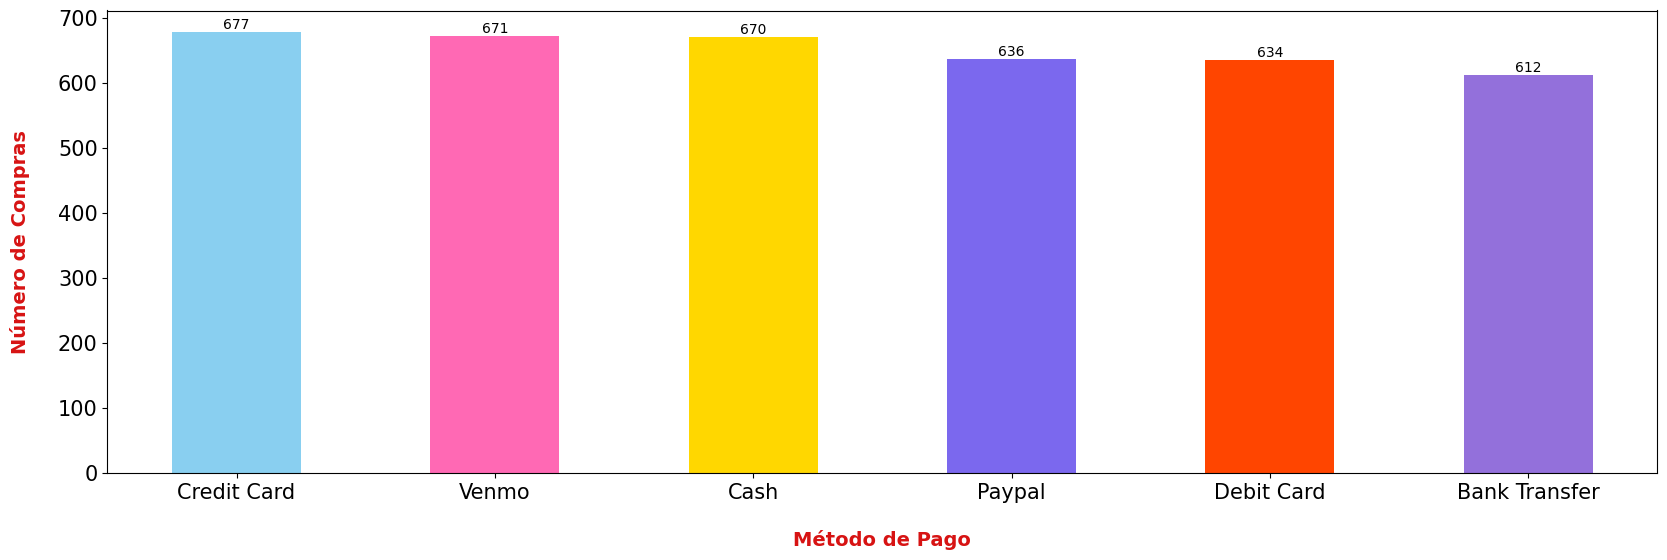

In [28]:
plt.figure(figsize = (20, 6))
ax = datos["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Método de Pago', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Número de Compras', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

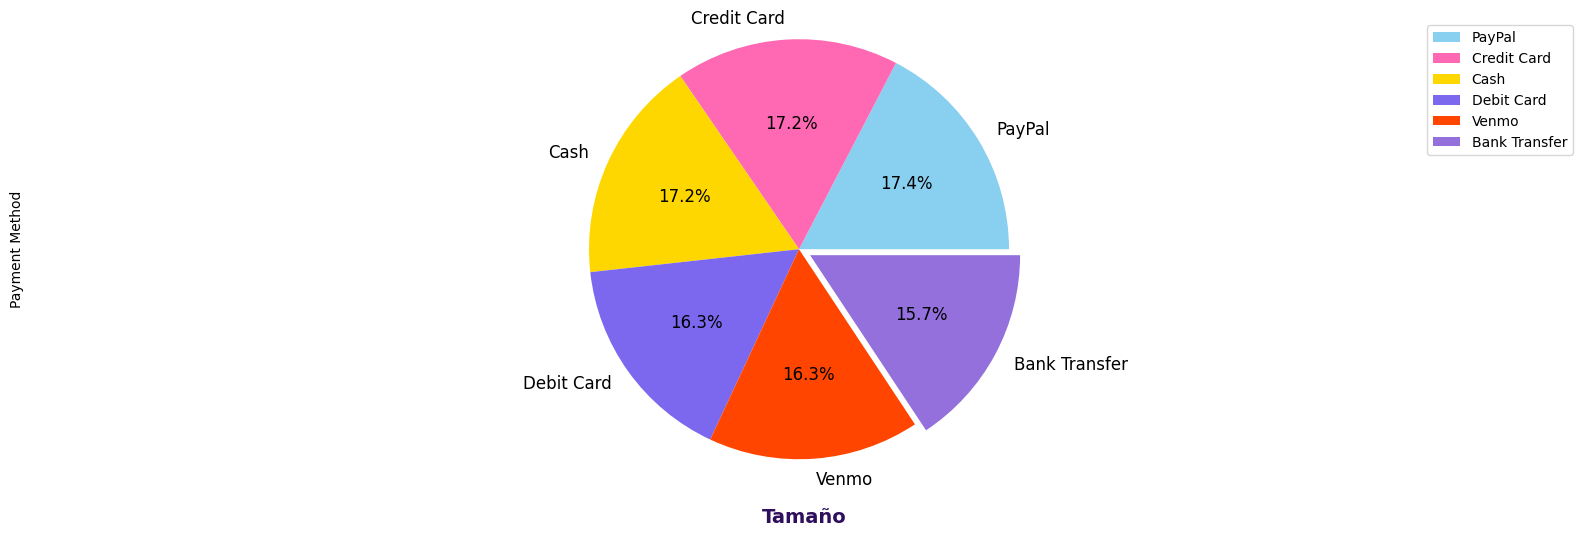

In [29]:
plt.figure(figsize = (20, 6))

counts = datos["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Tamaño', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

###Datos por Tipo de Envío

In [30]:
datos["Shipping Type"].value_counts()

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

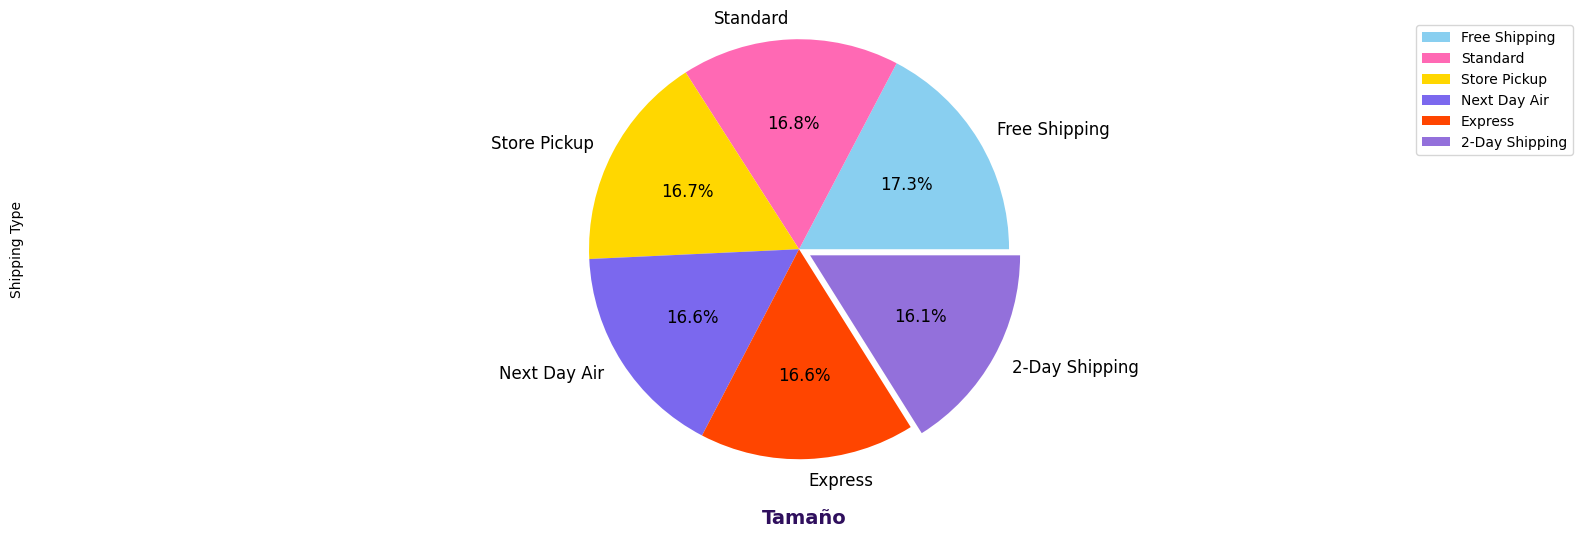

In [31]:
plt.figure(figsize = (20, 6))

counts = datos["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Tamaño', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

###Datos por Método de Pago

In [32]:
datos["Payment Method"].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

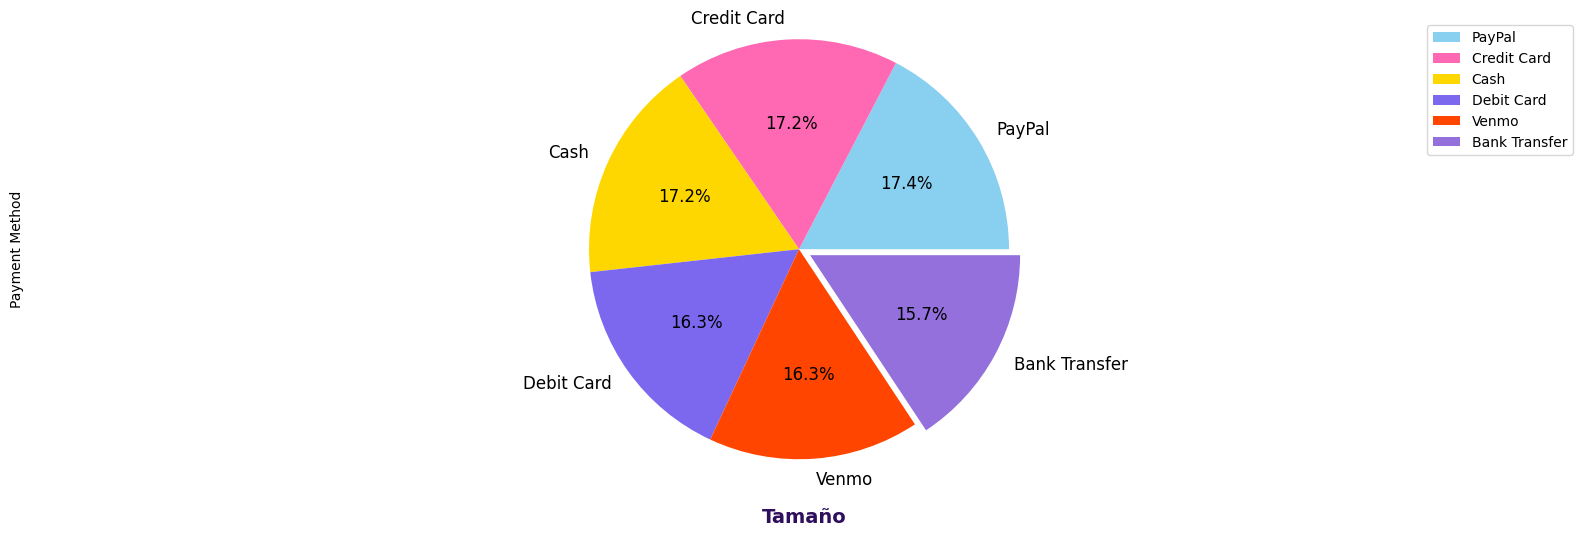

In [33]:
plt.figure(figsize = (20, 6))

counts = datos["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Tamaño', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

###Datos por Frecuencia de Compras

In [34]:
datos["Frequency of Purchases"].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

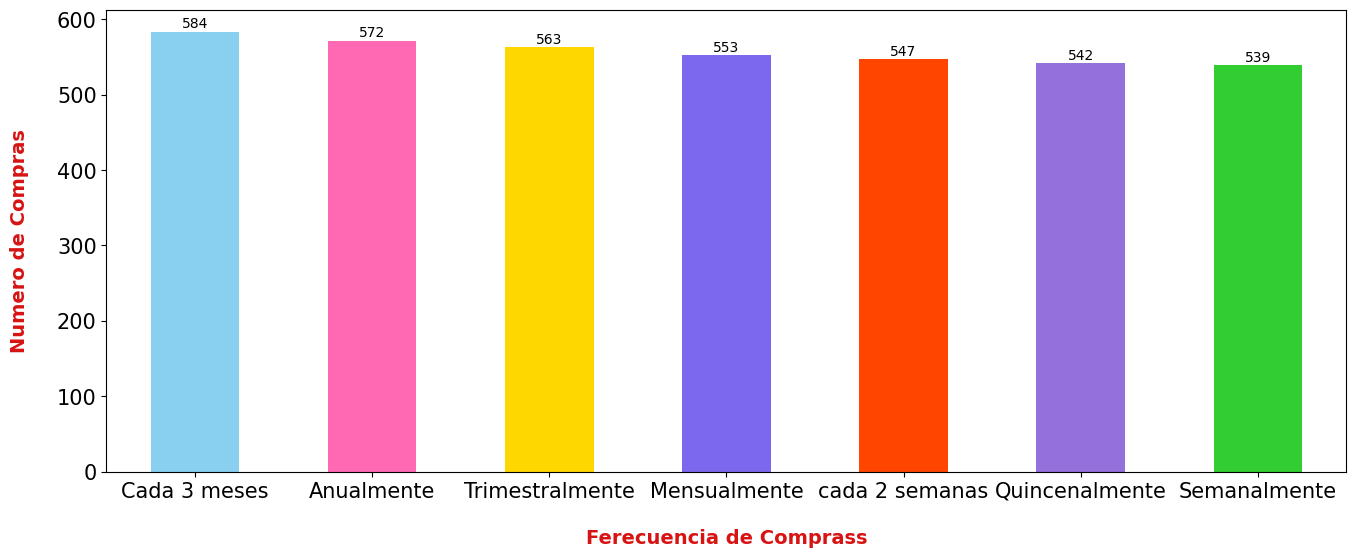

In [35]:
plt.figure(figsize = (16, 6))
ax = datos["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Cada 3 meses', 'Anualmente', 'Trimestralmente', 'Mensualmente', 'cada 2 semanas', 'Quincenalmente', 'Semanalmente'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Ferecuencia de Comprass', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Numero de Compras', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

##Análisis Estadístico de Datos

###¿Edad promedio de los clientes en el conjunto de datos?

In [36]:
average_age = datos['Age'].mean()
print("Edad promedio:", average_age)

Edad promedio: 44.06846153846154


###¿El Artículo más comprado?

In [37]:
most_common_item = datos['Item Purchased'].mode()[0]
print("Artículo más comprado:", most_common_item)

Artículo más comprado: Blouse


###¿Monto total de compra para cada categoría?

In [38]:
total_purchase_by_category = datos.groupby('Category')['Purchase Amount (USD)'].sum()
print("Monto Total de Compra por cada Categoría:")
print(total_purchase_by_category)

Monto Total de Compra por cada Categoría:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


###¿Calificación de revisión promedio para clientes masculinos y femeninos por separado?

In [39]:
average_rating_male = datos[datos['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = datos[datos['Gender'] == 'Female']['Review Rating'].mean()
print("Calificación de revisión promedio para clientes Masculinos:", average_rating_male)
print("Calificación de revisión promedio para clientes Femeninos:", average_rating_female)

Calificación de revisión promedio para clientes Masculinos: 3.7539592760180995
Calificación de revisión promedio para clientes Femeninos: 3.741426282051282


###¿Método de pago más común utilizado por los clientes?

In [40]:
most_common_payment_method = datos['Payment Method'].mode()[0]
print("Método de pago más común:", most_common_payment_method)

Método de pago más común: PayPal


###¿Cuántos clientes han optado por la Suscripción?

In [41]:
subscription_count = datos[datos['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Número de clientes con suscripción: ", subscription_count)

Número de clientes con suscripción:  1053


###¿Cuál es el monto promedio de compra para los clientes con un estado de suscripción de "Sí" y "No"?

In [42]:
avg_purchase_subscription_yes = datos[datos['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = datos[datos['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Importe promedio de compra para la suscripción 'Yes':", avg_purchase_subscription_yes)
print("Importe promedio de compra para la suscripción 'No':", avg_purchase_subscription_no)

Importe promedio de compra para la suscripción 'Yes': 59.49192782526116
Importe promedio de compra para la suscripción 'No': 59.865121180189675


###¿Temporada más común para compras?

In [43]:
most_common_season = datos['Season'].mode()[0]
print("Temporada más común para compras:", most_common_season)

Temporada más común para compras: Spring


###¿Cuál es el monto total de compra para cada género?

In [44]:
total_purchase_by_gender = datos.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Monto total de compra por género:")
print(total_purchase_by_gender)

Monto total de compra por género:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


###¿Cuál es la edad promedio de los clientes que realizaron compras en la temporada de Verano?

In [45]:
average_age_summer = datos[datos['Season'] == 'Summer']['Age'].mean()
print("Edad promedio clientes que realizaron compras en Verano:", average_age_summer)

Edad promedio clientes que realizaron compras en Verano: 43.973821989528794


###¿Cuál es la edad promedio de los clientes que realizaron compras en la temporada de Primavera?

In [46]:
average_age_sprng = datos[datos['Season'] == 'Spring']['Age'].mean()
print("Edad promedio clientes que realizaron compras en Primavera:", average_age_sprng)

Edad promedio clientes que realizaron compras en Primavera: 44.58258258258258


###¿Cuántos clientes utilizaron un código de promoción para su compra?

In [47]:
promo_code_count = datos[datos['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Número de clientes que utilizaron el código promocional:", promo_code_count)

Número de clientes que utilizaron el código promocional: 1677


###¿Cuál es la calificación de revisión máxima y mínima en el conjunto de datos?

In [48]:
max_review_rating = datos['Review Rating'].max()
min_review_rating = datos['Review Rating'].min()
print("Calificación máxima de revisión:", max_review_rating)
print("Calificación mínima de revisión:", min_review_rating)

Calificación máxima de revisión: 5.0
Calificación mínima de revisión: 2.5


###¿Cuál es el tipo de envío más común para los clientes con una calificación de reseña superior a 2?

In [49]:
common_shipping_high_rating = datos[datos['Review Rating'] > 2]['Shipping Type'].mode()[0]
print("Tipo de envío más común para calificaciones de revisión altas mayor a 2:", common_shipping_high_rating)

Tipo de envío más común para calificaciones de revisión altas mayor a 2: Free Shipping


###¿Cuál es el tipo de envío más común para los clientes con una calificación de reseña superior a 4?

In [50]:
common_shipping_high_rating = datos[datos['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Tipo de envío más común para calificaciones de revisión altas mayor a 4:", common_shipping_high_rating)

Tipo de envío más común para calificaciones de revisión altas mayor a 4: Standard


###¿Cuántos clientes han realizado más de 25 compras anteriores?

In [51]:
customers_above_25_previous_purchases = datos[datos['Previous Purchases'] > 25]['Customer ID'].count()
print("Número de Clientes con más de 25 Compras Anteriores:", customers_above_25_previous_purchases)

Número de Clientes con más de 25 Compras Anteriores: 1935


###¿Método de pago más común para los clientes que compran en la temporada de invierno?

In [52]:
total_purchase_free_shipping = datos[datos['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
print("Monto total de compra para el tipo de envío 'Envío gratis':", total_purchase_free_shipping)

Monto total de compra para el tipo de envío 'Envío gratis': 40777


###¿Cuál es el monto promedio de compra de los clientes que utilizaron un descuento?

In [53]:
avg_purchase_with_discount = datos[datos['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print("Monto promedio de compra para clientes con descuento aplicado:", avg_purchase_with_discount)

Monto promedio de compra para clientes con descuento aplicado: 59.27906976744186


###¿Cuál es la categoría más común de artículos comprados por clientas con una calificación de reseña inferior a 3?

In [54]:
common_category_low_rating_female = datos[(datos['Gender'] == 'Female') & (datos['Review Rating'] < 3)]['Category'].mode()[0]
print("Categoría más común para clientas femeninas con calificaciones bajas de reseñas:", common_category_low_rating_female)

Categoría más común para clientas femeninas con calificaciones bajas de reseñas: Clothing


###¿Cuál es el monto total de compra para los clientes en cada ubicación?

In [55]:
total_purchase_by_location = datos.groupby('Location')['Purchase Amount (USD)'].sum()
print("Monto total de compra por ubicación:" , total_purchase_by_location)

Monto total de compra por ubicación: Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee  

###¿Distribución de frecuencia de la columna 'Frecuencia de compras'?

In [56]:
purchase_frequency_distribution = datos['Frequency of Purchases'].value_counts()
print("Distribución de frecuencia de frecuencia de compra:")
print(purchase_frequency_distribution)

Distribución de frecuencia de frecuencia de compra:
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64


###¿Cantidad promedio de compra para cada color de artículos?

In [57]:
avg_purchase_by_color = datos.groupby('Color')['Purchase Amount (USD)'].mean()
print("Monto promedio de compra por color:")
print(avg_purchase_by_color)

Monto promedio de compra por color:
Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64


#Clasificación No Sepervisada - Clusterización
#Algoritmo K-Means


###K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

###El algoritmo consta de tres pasos:

###Inicialización: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.
###Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.
###Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.
###Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.

###El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

####Selección de datos con iloc:

####iloc es un método en pandas que permite la selección de datos basados en su ubicación numérica en el DataFrame. La sintaxis general es iloc[filas, columnas].

In [59]:
x = datos.iloc[:,[1,5]]

In [60]:
x

,Age,Purchase Amount (USD)
0,55,53
1,19,64
2,50,73
3,21,90
4,45,49
...,...,...
3895,40,28
3896,52,49
3897,46,33
3898,44,77


####El siguiente código en Python se utiliza para calcular la suma de los cuadrados de las distancias dentro de los clusters (WCSS, por sus siglas en inglés: Within-Cluster-Sum-of-Squares) en función del número de clusters (K) en un algoritmo de K-Means.
####Este procedimiento es comúnmente utilizado para determinar el número óptimo de clusters a utilizar en un algoritmo de K-Means mediante la visualización de un "codo" en un gráfico de WCSS versus el número de clusters.

In [61]:
wcss = []
for i in range(1,11):
  kmeans = KMeans( n_clusters=i , init="k-means++" , random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

####El siguiente código genera un gráfico de línea donde el eje x muestra el número de clusters y el eje y muestra el valor de la suma de los cuadrados de las distancias dentro de los clusters para cada número de clusters. Esta visualización se utiliza comúnmente para identificar el "codo" en el gráfico, lo que puede ayudar a determinar el número óptimo de clusters para utilizar en un algoritmo de clustering, en este caso, en el algoritmo K-Means.
#### En nuestro caso el numero óptimo es 4

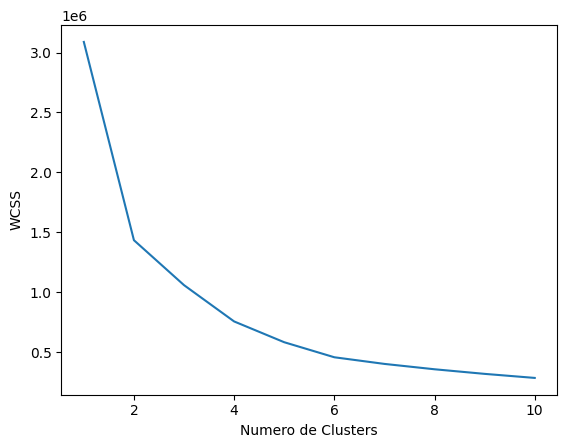

In [70]:
plt.plot(range(1,11),wcss)
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

####El siguiente código crea un modelo K-Means con 4 clusters, lo ajusta a los datos x y devuelve las etiquetas de los clusters a los que se asigna cada observación en x mediante el método fit_predict(). Esto es fundamental en el proceso de K-Means para asignar cada punto de datos a un cluster específico en base a la proximidad a los centroides.

In [63]:
kmeans = KMeans( n_clusters=4 , init="k-means++" , random_state = 42)

In [64]:
y_kmeans = kmeans.fit_predict(x)

####El código en las tres líneas siguientes genera un gráfico de dispersión donde cada punto representa una observación del conjunto de datos x, coloreado según el cluster al que pertenece, y los centroides de cada cluster también se muestran en el gráfico para visualizar la posición central de cada grupo.

In [65]:
y_kmeans

array([3, 1, 2, ..., 3, 1, 2], dtype=int32)

In [66]:
x_array = x.to_numpy()

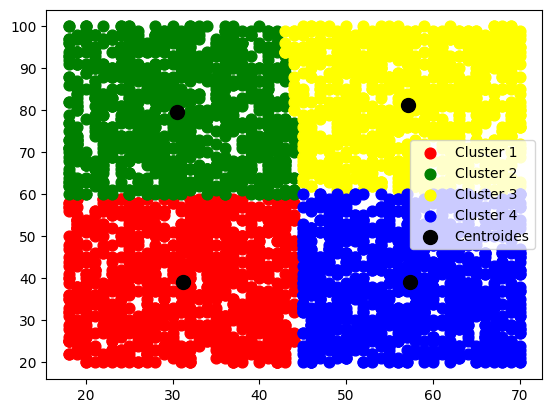

In [69]:
plt.scatter(x_array[y_kmeans==0,0], x_array[y_kmeans==0,1], s=60, c='red', label='Cluster 1')
plt.scatter(x_array[y_kmeans==1,0], x_array[y_kmeans==1,1], s=60, c='green', label='Cluster 2')
plt.scatter(x_array[y_kmeans==2,0], x_array[y_kmeans==2,1], s=60, c='yellow', label='Cluster 3')
plt.scatter(x_array[y_kmeans==3,0], x_array[y_kmeans==3,1], s=60, c='blue', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroides')
plt.legend()
plt.show()